#  Importando librerias

Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.31754771888522565
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.31497523107487646
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.3225614205613079
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.3231022204292029
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI

C:\Users\JCarlos\anaconda3\lib\site-packages\spectral\graphics\spypylab.py:729: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(**kwargs)


El indice espectral NDVI promedio es 0.3238681371972203
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.32506132331237353
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.3289252153740864
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.3332563722379224
Leyendo una imagen hiperespectral
El factor de reflectancia es 4095
El numero de lineas es 200
El numero de samples es 640
El numero de bandas es 240
El indice espectral NDVI promedio es 0.33822999815225796


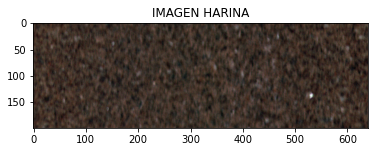

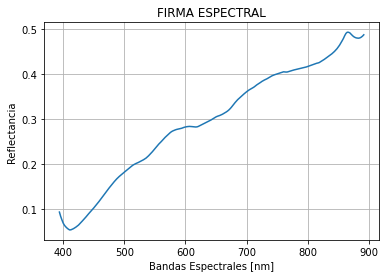

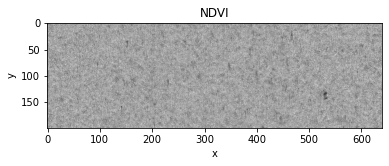

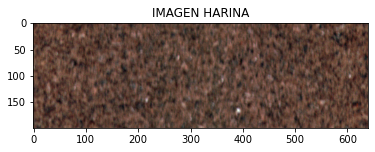

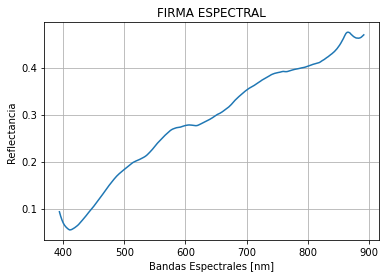

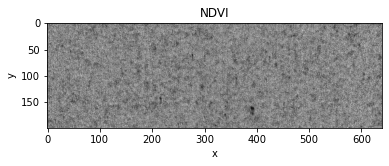

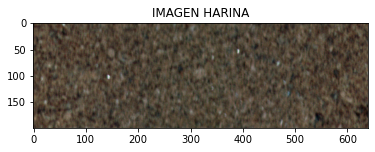

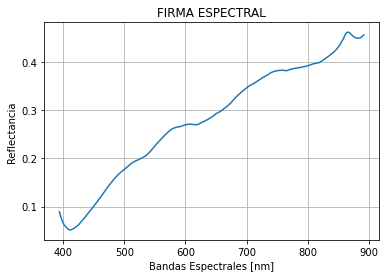

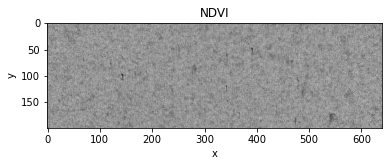

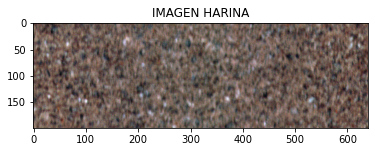

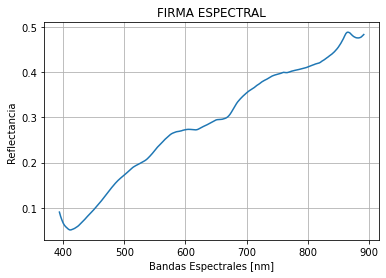

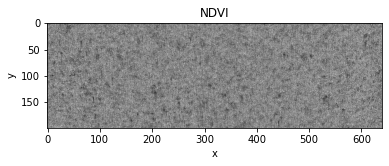

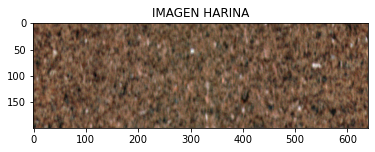

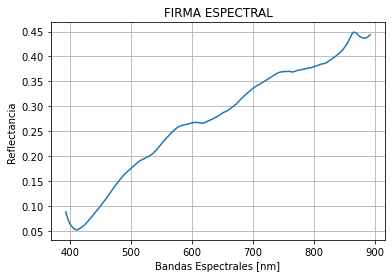

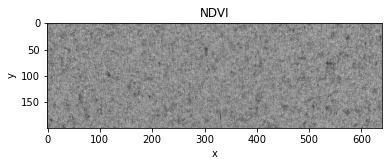

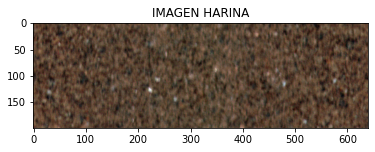

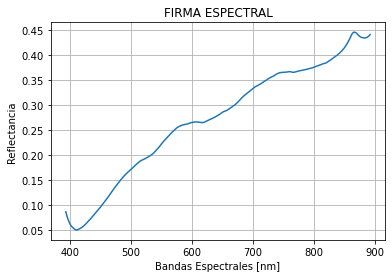

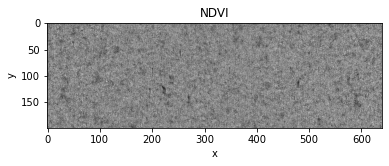

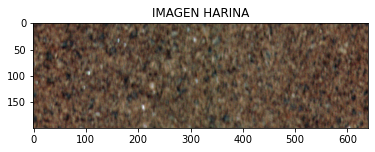

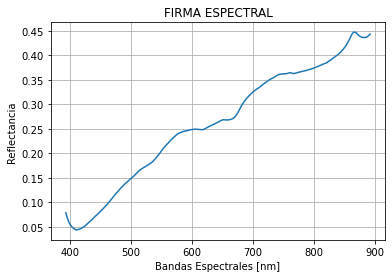

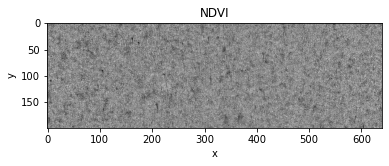

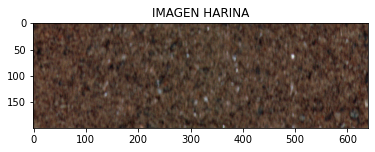

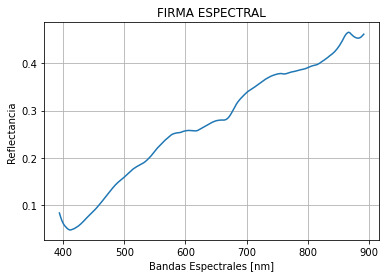

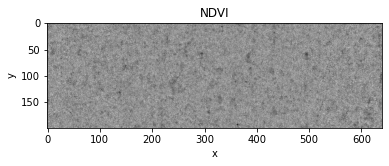

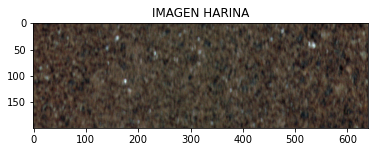

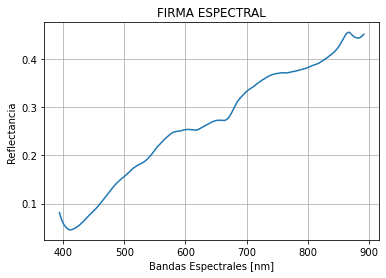

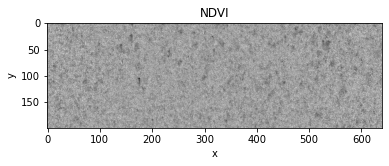

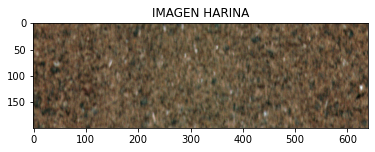

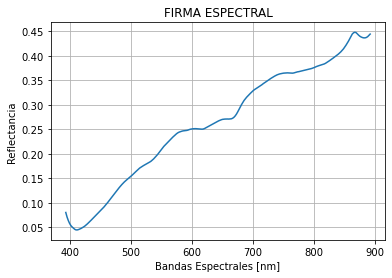

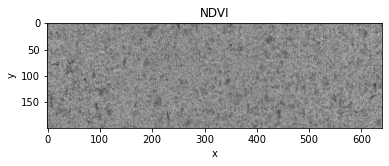

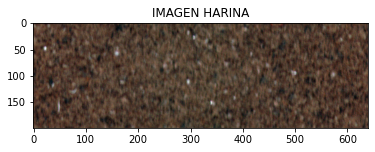

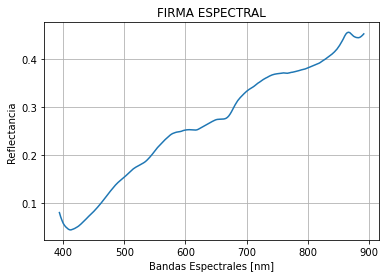

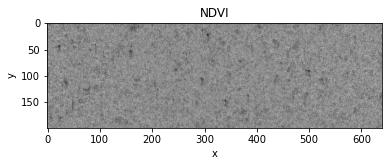

In [38]:
from spectral import *
import spectral.io.envi as envi
import cv
import numpy as np 
import time
import numpy as np
import scipy.fftpack
import math
import spectral.io.aviris as aviris
import matplotlib.pyplot as plt
import openpyxl


def hyper_image(file):     #Cargando una imagen espectral
    
    print("Leyendo una imagen hiperespectral")
    #img = open_image(file).load()
    img = envi.open(file) #carga la imagen hiperespectral
    
    reflactance_scale_factor = int(img.scale_factor)
    print("El factor de reflectancia es",reflactance_scale_factor)

    archivo = open(file) #lee el archivo .bil.hdr para extraer parametros 
    l=archivo.read()
    nlines = int(l[45:48])
    nsamples = int(l[59:62])
    nbands = int(l[71:74])
    
    print("El numero de lineas es", nlines)
    print("El numero de samples es", nsamples)
    print("El numero de bandas es", nbands)
    
    view = imshow(img,(120, 60, 40))
    plt.title('IMAGEN HARINA')

    return (img, nlines, nsamples, nbands)


def spectral(img, nlines, nsamples):   #Graficando la firma espectral
    
    bands_ = img.bands.centers  #bandas espctrales
   
    #imshow(img.read_band(50))
    #plt.plot(img.read_pixel(10,10))
    
    espec = 0
    Area = nlines*nsamples
    for i in range(nlines):
        for j in range(nsamples):
            #plt.plot(img.read_pixel(i,j))
            espec = espec + img.read_pixel(i,j)
    espec = espec/Area

    plt.figure()
    plt.plot(bands_,espec)
    plt.title('FIRMA ESPECTRAL')
    plt.ylabel('Reflectancia')
    plt.xlabel('Bandas Espectrales [nm]')
    plt.grid()
    
    return (espec, bands_)


def save_data(espec,i):  #Guardando la firma espectral
    
    espe = list(espec)
    hoja = wb.active
    
    if (i==0):
        encabezado = []
        for j in bands:
            encabezado.append(str(j+1))
        hoja.append(encabezado)     #banda en logitud de honda
        hoja.append(range(1,nbands+1))      #banda en valor numerico

    hoja.cell(row=i+1,column=1)
    hoja.append(espe)
    wb.save('DataHiper.xlsx')
    

def spectral_index(img, nlines, nsamples):

    indx = 0
    red = img.read_band(21)
    nir = img.read_band(43)
    vi = (nir - red)/(nir + red)
    v = imshow(vi)
    plt.title('NDVI')
    plt.ylabel('y')
    plt.xlabel('x')

    indx = 0
    Area = nlines*nsamples
    for i in range(nlines):
        for j in range(nsamples):
            indx = indx + vi[i,j]
    
    indx = indx/Area
    
    print("El indice espectral NDVI promedio es", indx)

    return (indx)
    


wb = openpyxl.Workbook()  
    
for i in range(11):  
    num = 100 + i
    file_ = 'C011180'+ str(num)
    ext = '.bil.hdr'
    file = file_ + ext
  
    [img, nlines,nsamples, nbands] = hyper_image(file)
    [espec, bands] = spectral(img, nlines, nsamples)
    spectral_index(img, nlines, nsamples)  
    save_data(espec,i)
    


# Calcular Indice Espectral NDVI con la función

In [ ]:
def spectral_index_1(self):
    red = 21
    nir = 43
    ie = ndvi(img, red, nir)
    imshow(ie)
    plt.title('NDVI')
    plt.ylabel('y')
    plt.xlabel('x')
    
spectral_index_1(img)

# Firma Espectral Creando Cluster

In [ ]:
#Graficando la firma espectral

def spectral_0(img):
    bands2 = img.bands.centers  #bandas espctrales
    #print("bandas")
    #print (bands2)
    (m, c) = kmeans(img, 4, 5)
    #m = resolucion espacial 200x640
    #c = valores de reflectancia, 240 bandas
    plt.figure()
    for i in range(c.shape[0]):
        plt.plot(bands2,c[i])
    plt.title('FIRMA ESPECTRAL')
    plt.ylabel('Reflectancia')
    plt.xlabel('Bandas Espectrales [nm]')
    plt.grid()
    
spectral_0(img)